##         <CENTER>CUSTOMER CHURN PREDICTION</CENTER>

In [1]:
##Importing All the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import missingno as mn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB,ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,plot_confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay,plot_precision_recall_curve,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading the data

In [4]:
ban=pd.read_csv('Churn_Modelling.csv')

In [5]:
ban

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
ban.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
##Defines Shape of the data

In [8]:
ban.shape

(10000, 14)

In [9]:
##Data types of Features in the data

In [10]:
ban.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
## Checking null values

In [12]:
ban.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
ban.isnull().sum().sum()

0

<AxesSubplot:>

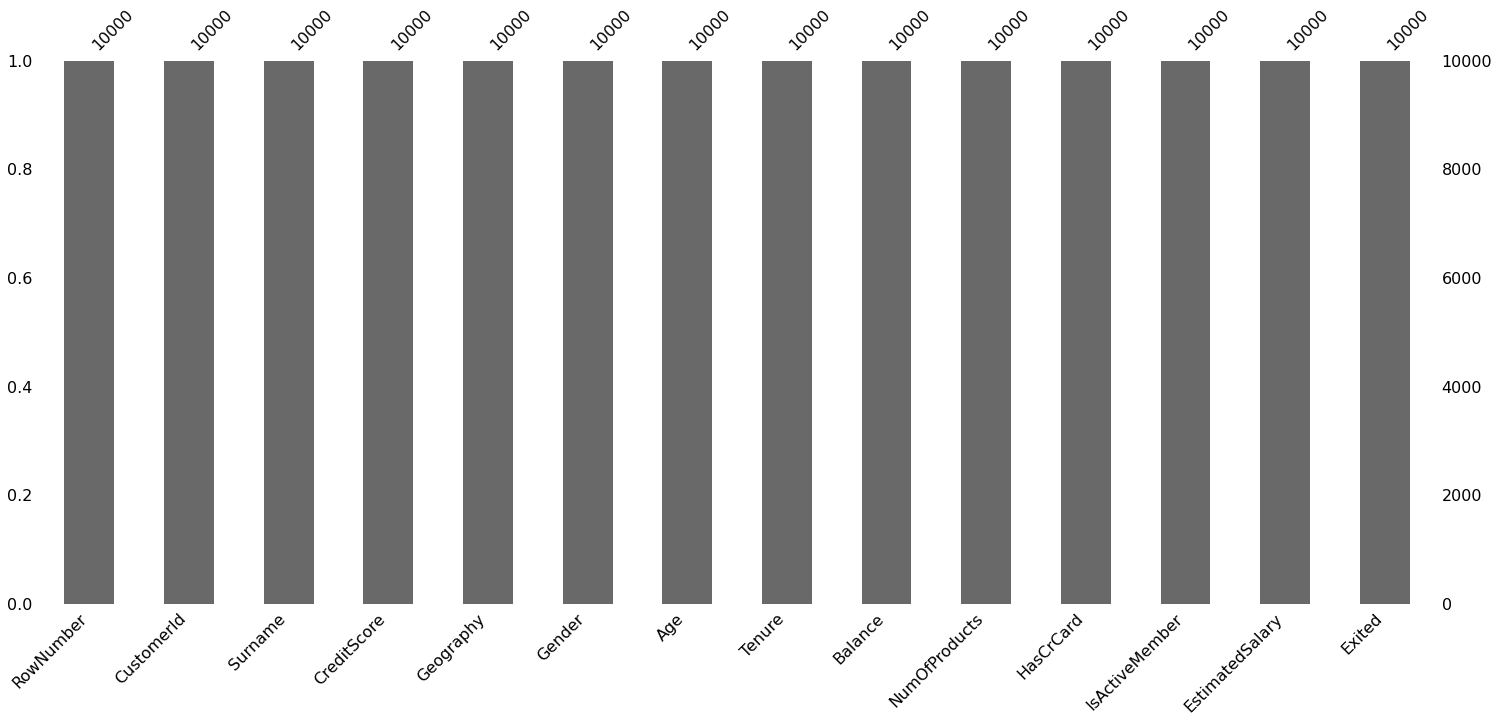

In [14]:
mn.bar(ban)

In [15]:
## Dropping Features that doesn't impact the Target variable

In [16]:
ban=ban.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [17]:
##Checking the unique values of each feature

In [18]:
ban['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [19]:
ban['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [20]:
ban['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [21]:
ban['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [22]:
ban['Balance'].nunique()

6382

In [23]:
ban['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [24]:
ban['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [25]:
ban['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78])

In [26]:
ban['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [27]:
## It describes the statistical summary of data

In [28]:
ban.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
## Exploratory Data Analysis

In [30]:
## Active vs InActive Customers 
## You could observe more Active Customers in our data plotted through Countplot

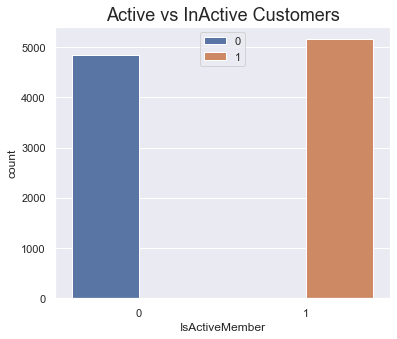

In [31]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.countplot('IsActiveMember',hue='IsActiveMember',data=ban)
plt.legend(loc='upper center')
plt.title('Active vs InActive Customers',size=18)
plt.show()

In [32]:
## Univariate Analyis on 'Tenure'

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


Text(0.5, 1.0, 'Count of Tenure')

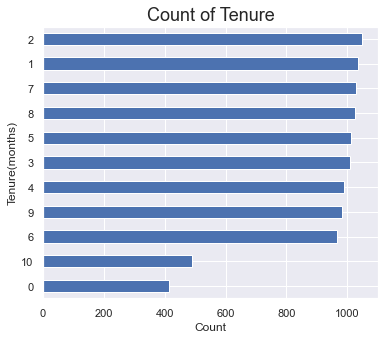

In [33]:
print(ban['Tenure'].value_counts())
ban['Tenure'].value_counts().sort_values().plot(kind='barh', figsize=(6,5))
plt.xlabel("Count")
plt.ylabel("Tenure(months)")
plt.title("Count of Tenure",size=18)

In [34]:
## the percentage of Males and females are like 54.57 and 45.43.

Male      5457
Female    4543
Name: Gender, dtype: int64


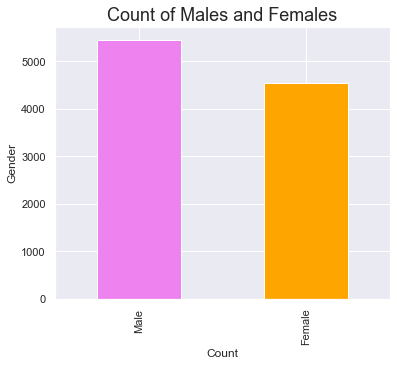

In [35]:
print(ban['Gender'].value_counts())
ban['Gender'].value_counts().plot(kind='bar', figsize=(6,5),color=['violet', 'orange'])
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Count of Males and Females",size=18)
plt.show()

In [36]:
## The customers who left the bank are more in percentage .This may Cause imbalance in data.

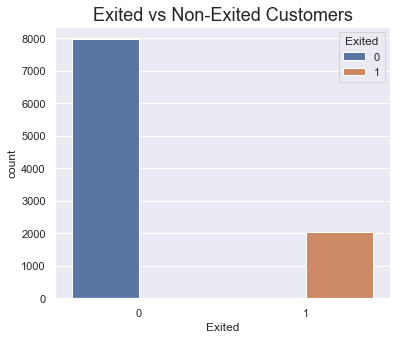

In [37]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.countplot('Exited',hue='Exited',data=ban)
plt.title('Exited vs Non-Exited Customers',size=18)
plt.show()

In [38]:
## The Age group between 30-45 has seen rise in the trend below.

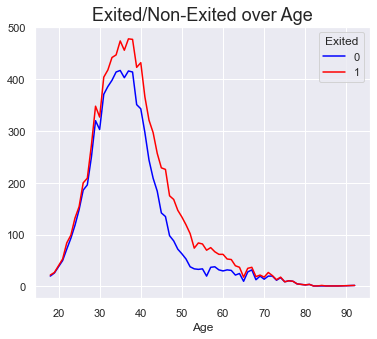

In [39]:
e=ban.groupby(by=['Age','Exited']).Exited.count().unstack()
e.plot(kind='line',stacked=True,color=['blue','red'],figsize=(6,5))
plt.title('Exited/Non-Exited over Age',size=18)
plt.show()

In [40]:
## Customers that have tenure of 1-5 years has observed increase in churn rate.

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101


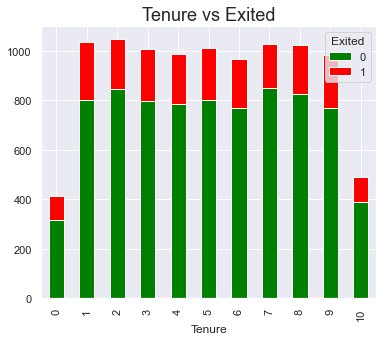

In [41]:
c=ban.groupby(by=['Tenure','Exited']).Exited.count().unstack()
c.plot(kind='bar',stacked=True,color=['green','red'],figsize=(6,5))
print(c)
plt.title('Tenure vs Exited',size=18)
plt.show()

In [42]:
##q=ban.groupby(by=['Age','EstimatedSalary']).Exited.count().unstack()
##q.plot(kind='line',stacked=True,color=['blue','green'],figsize=(6,5))
##print(q)
##plt.show()

In [43]:
## Even though male are populous, Suprisingly Female customers opted out of the bank.

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


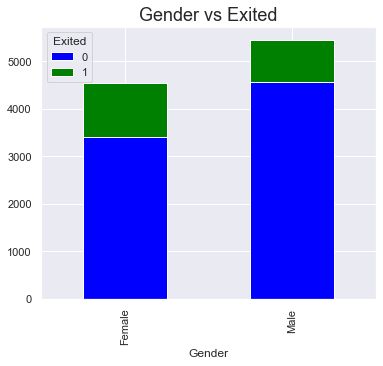

In [44]:
c=ban.groupby(by=['Gender','Exited']).Exited.count().unstack()
c.plot(kind='bar',stacked=True,color=['blue','green'],figsize=(6,5))
print(c)
plt.title('Gender vs Exited',size=18)
plt.show()

In [45]:
## People with accounts in France and Germany have churned the most .

Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


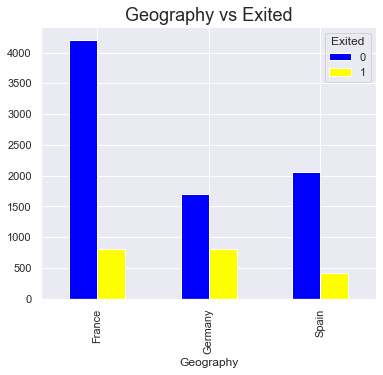

In [46]:
c1=ban.groupby(by=['Geography','Exited']).Exited.count().unstack()
c1.plot(kind='bar',color=['blue','yellow'],figsize=(6,5))
print(c1)
plt.title('Geography vs Exited',size=18)
plt.show()

In [47]:
ban['Exited'].unique() ##This is the Feature We want to be predicted

array([1, 0], dtype=int64)

In [48]:
## The below HeatMap defines the How the features are correlated either positive or negative.

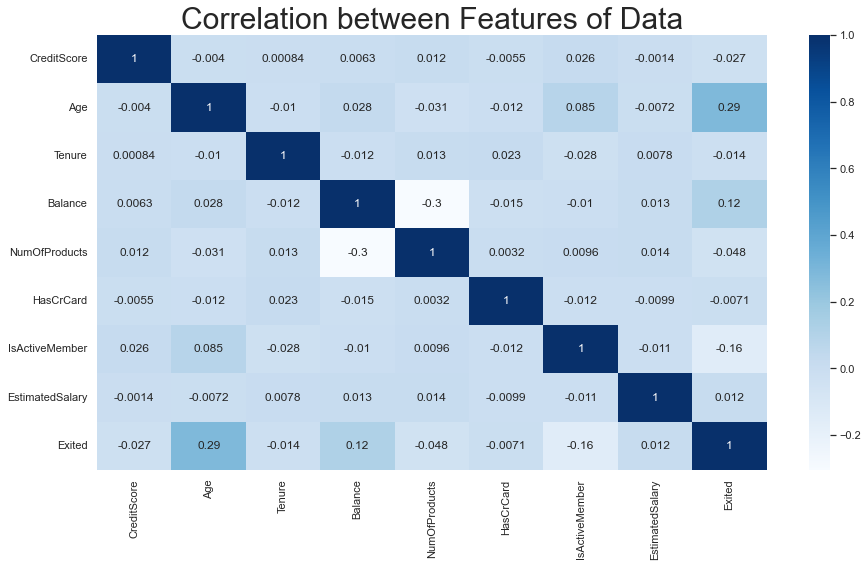

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(ban.corr(), cmap='Blues',annot=True)
plt.title('Correlation between Features of Data',size=30)
plt.show()


In [50]:
ban.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [51]:
## the boxplot distribution helps us to Check whether data has any outliers

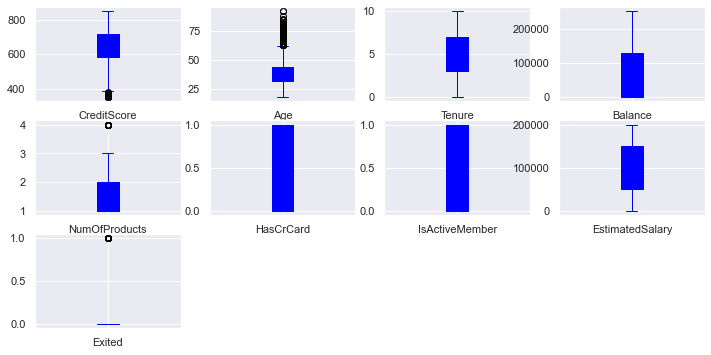

In [52]:
ban.plot(kind='box', subplots=True, layout=(4,4),sharex=False, sharey=False, color = 'blue', figsize=(12,8), patch_artist=True ) 
plt.show()

In [53]:
##You could see outliers in 'CreditScore','Age','NumOfProducts' Features

In [54]:
for i ,j in enumerate(['CreditScore','Age','NumOfProducts']):
  print(j)
      

CreditScore
Age
NumOfProducts


In [55]:
## Detection and Treatment of Outliers

In [56]:
##Find IQR
Q1=[]
Q3=[]
iqr=[]
upp=[]
low=[]

for i,j in enumerate(['CreditScore','Age','NumOfProducts']):
    Q1.append(ban[j].quantile(0.25))
    Q3.append(ban[j].quantile(0.75))
    iqr.append(np.array(Q3[i])-np.array(Q1[i]))
    upp.append(Q3[i] + 1.5 * iqr[i])
    low.append(Q1[i] - 1.5 * iqr[i])


In [57]:
ban[ban['CreditScore']>upp[0]]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [58]:
ban[ban['CreditScore']<low[0]]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [59]:
ban[ban['Age']>upp[1]]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


In [60]:
ban[ban['Age']<low[1]]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [61]:
ban[ban['NumOfProducts']<low[2]]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [62]:
ban[ban['NumOfProducts']>upp[2]]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
70,738,Germany,Male,58,2,133745.44,4,1,0,28373.86,1
1254,628,France,Female,46,1,46870.43,4,1,0,31272.14,1
1469,819,Germany,Female,49,1,120656.86,4,0,0,166164.30,1
1488,596,Spain,Male,30,6,121345.88,4,1,0,41921.75,1
1701,792,France,Male,50,9,0.00,4,1,1,194700.81,1
1876,640,Germany,Male,39,9,131607.28,4,0,1,6981.43,1
2124,704,France,Male,32,7,127785.17,4,0,0,184464.70,1
2196,773,Germany,Male,47,2,118079.47,4,1,1,143007.49,1
2285,630,Germany,Male,50,3,129370.91,4,1,1,47775.34,1


In [63]:
## Trimming the Outliers

In [64]:
ban_no=ban[ban['CreditScore']>low[0]]
ban_no=ban_no[ban_no['Age']<upp[1]]
ban_no=ban_no[ban_no['NumOfProducts']<upp[2]]

In [65]:
ban_no

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [66]:
## Encoding the Data i.e One-hot Encoding

In [67]:
ban_cat=ban_no.select_dtypes(include='object')

In [68]:
ban_cat

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [69]:
ban_num=ban_no.select_dtypes(exclude='object')

In [70]:
ban_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [71]:
ban_cat=pd.get_dummies(ban_cat,prefix=None) ##one hot encoding

In [72]:
ban_new=pd.concat([ban_num,ban_cat],axis=1)

In [73]:
ban_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [74]:
##Splitting the data into input and target data

In [75]:
x=ban_new.drop('Exited',axis=1)
y=ban_new['Exited']

In [76]:
## Distrubution of Data using Histogram plot

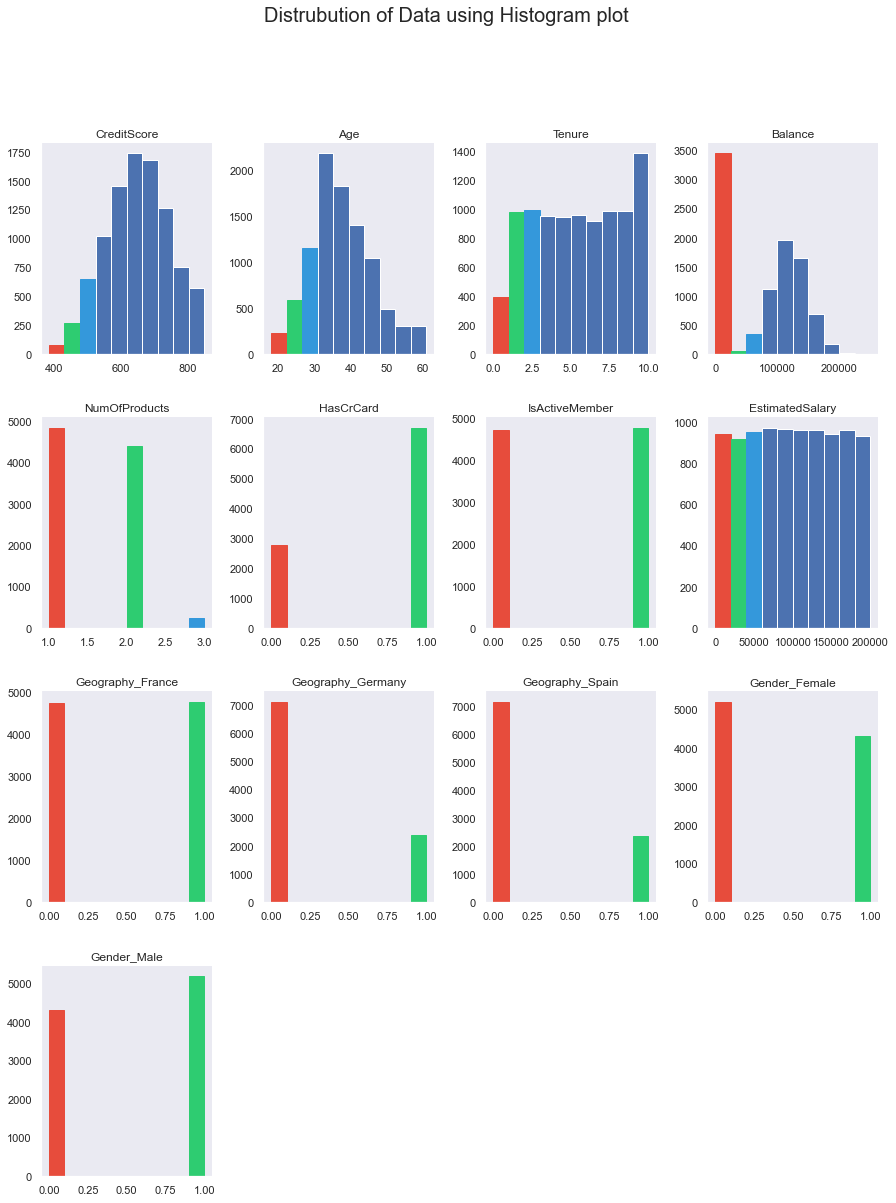

In [77]:
from numpy.core.fromnumeric import size
axis=x.hist(figsize=(15,19)) 
colors = ["#e74c3c", "#2ecc71", "#3498db"]
plt.suptitle('Distrubution of Data using Histogram plot',size=20)
for i, ax in enumerate(axis.reshape(-1)):
    # Create a counter to ensure that if there are more than three bars containing a value.
    ## We don't try to access elements in colors that are out of range.
    w = 0
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for rect in ax.patches:
        # If there's a value in the rect and we have defined a color
        if rect.get_height() > 0 and w < len(colors):
            # Set up the color
            rect.set_color(colors[w])
            # Increment the counter
            w += 1

In [78]:
##Train_test_split is used to split the original data into train and test data

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
##Pipeline
## An ML pipeline automates the machine learning workflow by allowing data to be transformed and correlated into a model,
## which can then be examined to produce results.
##Scaling also has been imported into Pipelines.

In [81]:
pipe_lreg = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(random_state=42))])

pipe_rfor=Pipeline([('scl',StandardScaler()),('clf',RandomForestClassifier(random_state=42))])

pipe_dt=Pipeline([('scl',StandardScaler()),('clf',DecisionTreeClassifier(random_state=42))])

pipe_cnb=Pipeline([('scl',MinMaxScaler()),('clf',ComplementNB())])

pipe_knn=Pipeline([('scl',StandardScaler()),('clf',KNeighborsClassifier())])

pipe_svm=Pipeline([('scl',StandardScaler()),('clf',svm.SVC(random_state=42))])

a=[pipe_lreg,pipe_rfor,pipe_dt,pipe_cnb,pipe_knn,pipe_svm]

In [82]:
dic={0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'Complement Naive Bayes',4:'KNN',5:'SVM'}

In [83]:
## Plotting the Confusion Matrix for each model.

Logistic Regression :


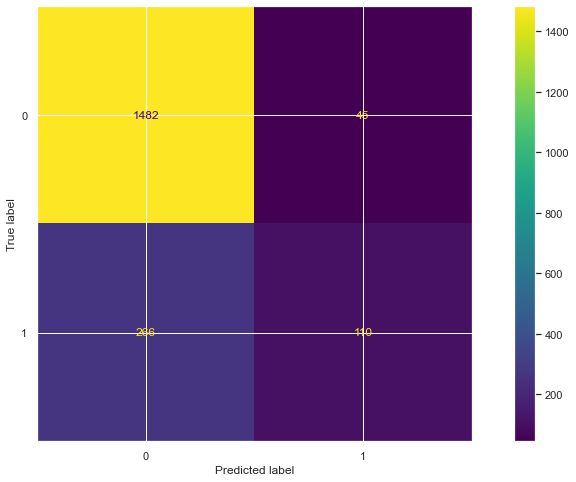

Random Forest :


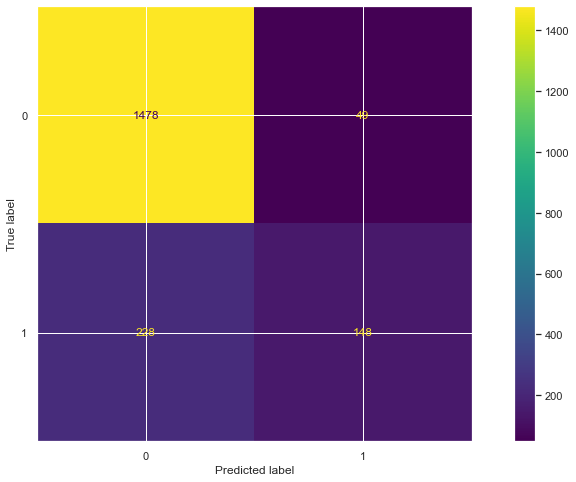

Decision Tree :


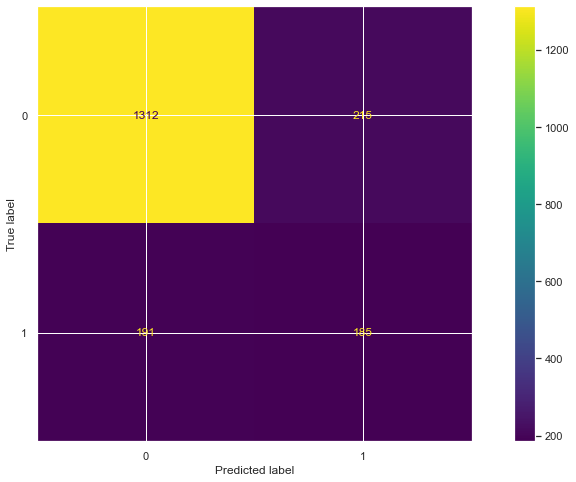

Complement Naive Bayes :


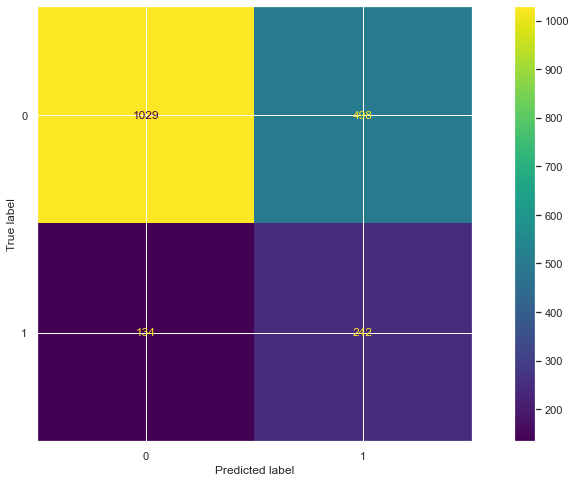

KNN :


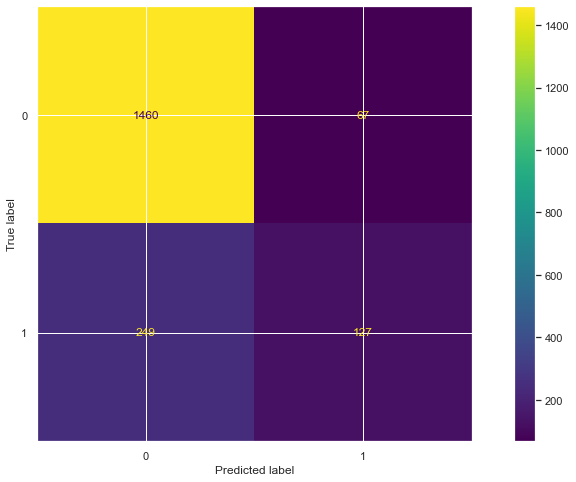

SVM :


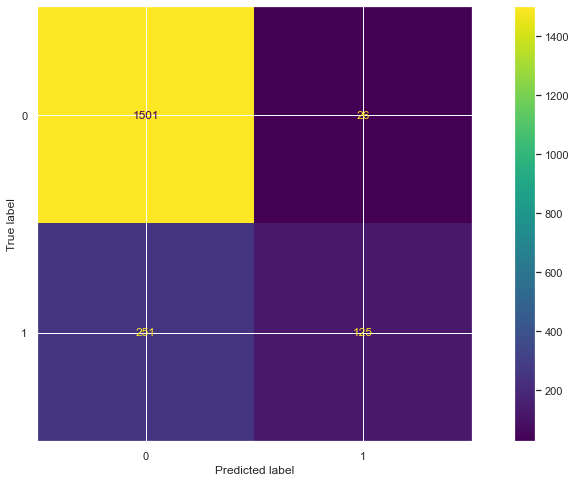

In [84]:
for i,j in enumerate(a):
  j.fit(x_train,y_train)
  pred=j.predict(x_test)
  print(dic[i],':')
  plot_confusion_matrix( j, x_test, y_test)
  plt.show()
  

In [85]:
## Plotting the Accuracy for each model.

In [86]:
for i,j in enumerate(a):
  j.fit(x_train,y_train)
  pred=j.predict(x_test)
  print(dic[i],':')
  print(accuracy_score(y_test,pred))
  plt.show()

Logistic Regression :
0.836573830793484
Random Forest :
0.8544403573305307
Decision Tree :
0.7866526537046769
Complement Naive Bayes :
0.6678928008407777
KNN :
0.8339464004203888
SVM :
0.8544403573305307


In [87]:
## Plotting Precision-Recall Curve for each Model.

Logistic Regression :


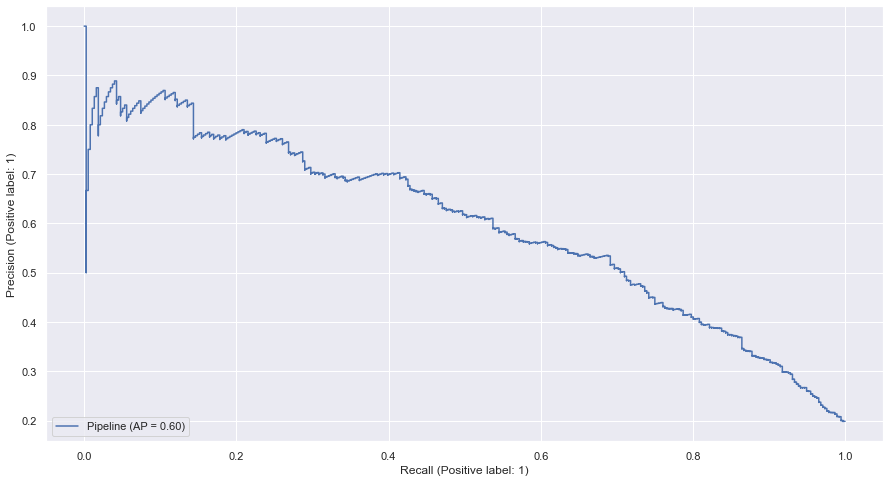

Random Forest :


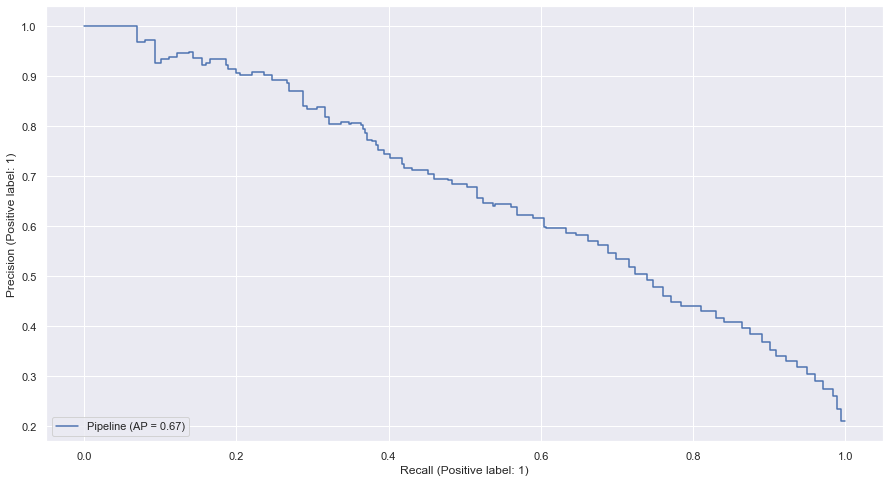

Decision Tree :


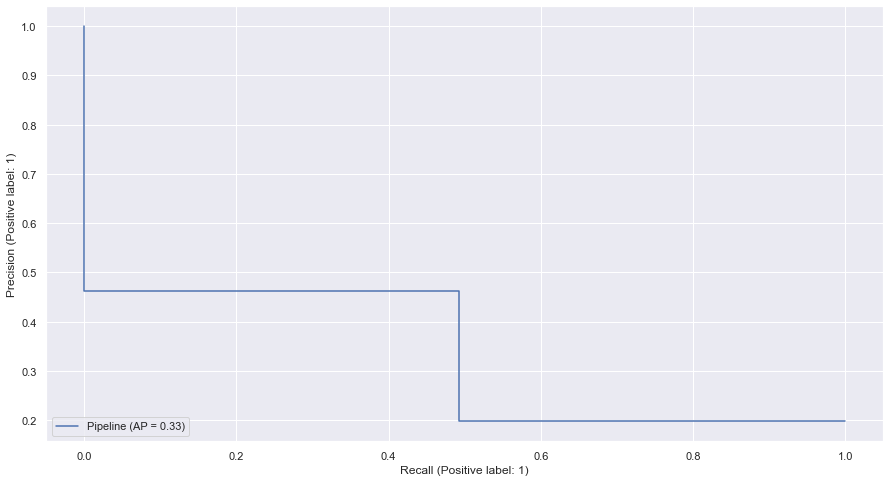

Complement Naive Bayes :


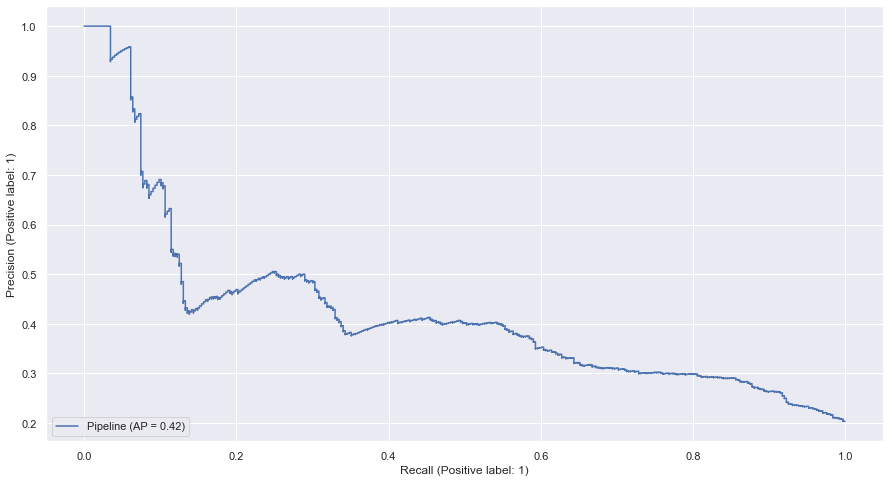

KNN :


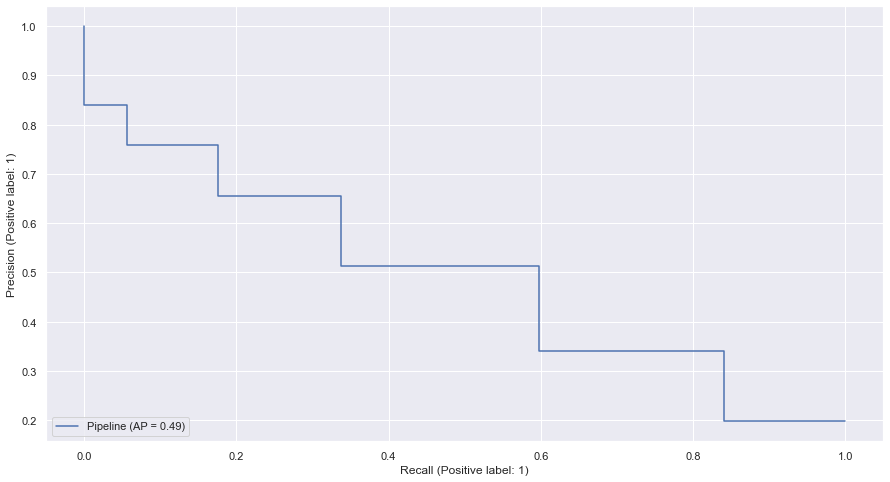

SVM :


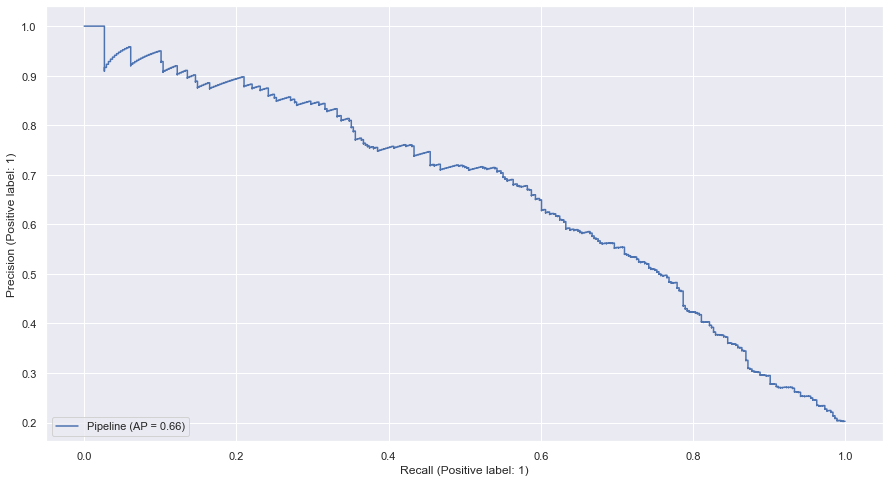

In [88]:
for i,j in enumerate(a):
  j.fit(x_train,y_train)
  pred=j.predict(x_test)
  print(dic[i],':')
  plot_precision_recall_curve(j,x_test,y_test)
  plt.show()

In [89]:
##F1 Score and Classification Report For Each Model.

In [90]:
for i,j in enumerate(a):
  j.fit(x_train,y_train)
  pred=j.predict(x_test)
  print(dic[i],':')
  print(f1_score(y_test,pred))
  print(classification_report(y_test,pred))
  plt.show()

Logistic Regression :
0.4143126177024482
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1527
           1       0.71      0.29      0.41       376

    accuracy                           0.84      1903
   macro avg       0.78      0.63      0.66      1903
weighted avg       0.82      0.84      0.81      1903

Random Forest :
0.5165794066317627
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1527
           1       0.75      0.39      0.52       376

    accuracy                           0.85      1903
   macro avg       0.81      0.68      0.72      1903
weighted avg       0.84      0.85      0.84      1903

Decision Tree :
0.47680412371134023
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1527
           1       0.46      0.49      0.48       376

    accuracy                           0.79      1903
   macro avg    

In [91]:
##Hyperparameter Tuning involves choosing a set of optimal hyperparameters for the learning algorithm. Hyperparameters Search i.e.,
## Grid search picks out a grid of hyperparameter values and evaluates all of them, and finds the best parameter to the model. 

In [92]:
# Set up grid search parameters
param_range = [1,2,4,7,9]
param_range_fl = [1.0, 0.5, 0.1,0.0001, 0.001]

params_grid_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

params_grid_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

params_grid_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]

params_grid_dt=[{'clf__criterion':['gini', 'entropy']
    ,'clf__max_depth' : param_range }]

params_grid_cnb ={'clf__alpha':[0.1,0.3,0.8,1]}
params_grid_knn=[{'clf__n_neighbors':param_range,'clf__weights':['uniform','distance'],'clf__metric':['euclidean','manhattan']}]

In [93]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lreg,
			param_grid=params_grid_lr,
			scoring='f1',
			cv=10) 
			
			
gs_rf = GridSearchCV(estimator=pipe_rfor,
			param_grid=params_grid_rf,
			scoring='f1',
			cv=10, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=params_grid_svm,
			scoring='f1',
			cv=10,
			n_jobs=jobs)

gs_knn = GridSearchCV(estimator=pipe_knn,
			param_grid=params_grid_knn,
			scoring='f1',
			cv=10,
			n_jobs=jobs)
gs_dt = GridSearchCV(estimator=pipe_dt,
			param_grid=params_grid_dt,
			scoring='f1',
			cv=10,
			n_jobs=jobs)
gs_cnb = GridSearchCV(estimator=pipe_cnb,
			param_grid=params_grid_cnb,
			scoring='f1',
			cv=10,
			n_jobs=jobs)



In [94]:

# Listing pipelines for ease of iteration
grids = [gs_lr,gs_rf, gs_dt,gs_cnb,gs_knn, gs_svm]

In [95]:
##Finding the Best parameters of each model

In [96]:

for i,gs in enumerate(grids):
    print('Estimator',dic[i])
    gs.fit(x_train,y_train)
    print('Best params: %s' % gs.best_params_)
    ypred=gs.predict(x_test)


Estimator Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Estimator Random Forest
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Estimator Decision Tree
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 7}
Estimator Complement Naive Bayes
Best params: {'clf__alpha': 0.1}
Estimator KNN
Best params: {'clf__metric': 'euclidean', 'clf__n_neighbors': 1, 'clf__weights': 'uniform'}
Estimator SVM
Best params: {'clf__C': 9, 'clf__kernel': 'rbf'}


In [97]:
##Applying those parameters to each model and repeating the same process.

In [98]:
pipe_lreg1 = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(C=1.0, penalty='l2', solver='liblinear',random_state=42))])

pipe_rfor1=Pipeline([('scl',StandardScaler()),('clf',RandomForestClassifier(criterion= 'gini',max_depth=9, min_samples_leaf= 1,min_samples_split= 2,random_state=42))])

pipe_dt1=Pipeline([('scl',StandardScaler()),('clf',DecisionTreeClassifier(criterion='gini', max_depth= 7,random_state=42))])

pipe_cnb1=Pipeline([('scl',MinMaxScaler()),('clf',ComplementNB(alpha= 0.1))])

pipe_knn1=Pipeline([('scl',StandardScaler()),('clf',KNeighborsClassifier(metric='euclidean',n_neighbors= 1, weights='uniform'))])

pipe_svm1=Pipeline([('scl',StandardScaler()),('clf',svm.SVC(C= 9, kernel='rbf',random_state=42))])

In [99]:
b=[pipe_lreg1,pipe_rfor1,pipe_dt1,pipe_cnb1,pipe_knn1,pipe_svm1]

In [100]:
for i,j in enumerate(b):
  j.fit(x_train,y_train)
  pred1=j.predict(x_test)
  print(dic[i],':')
  print(accuracy_score(y_test,pred1))

Logistic Regression :
0.836573830793484
Random Forest :
0.8591697320021019
Decision Tree :
0.8575932737782449
Complement Naive Bayes :
0.6678928008407777
KNN :
0.7929584866001052
SVM :
0.8565423016290068


Logistic Regression :


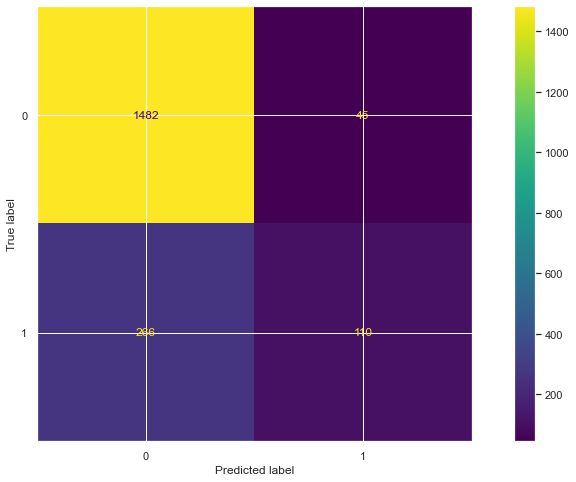

Random Forest :


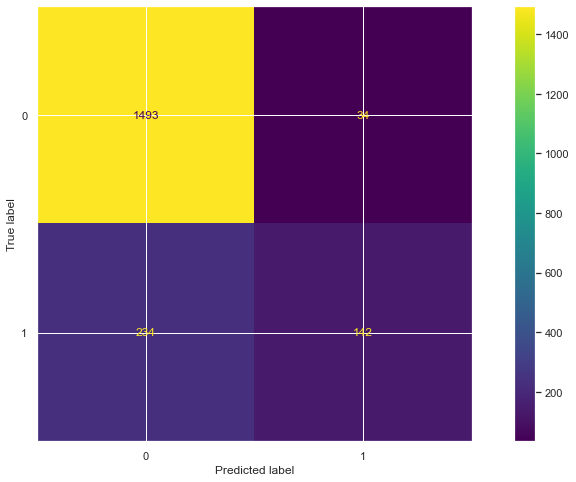

Decision Tree :


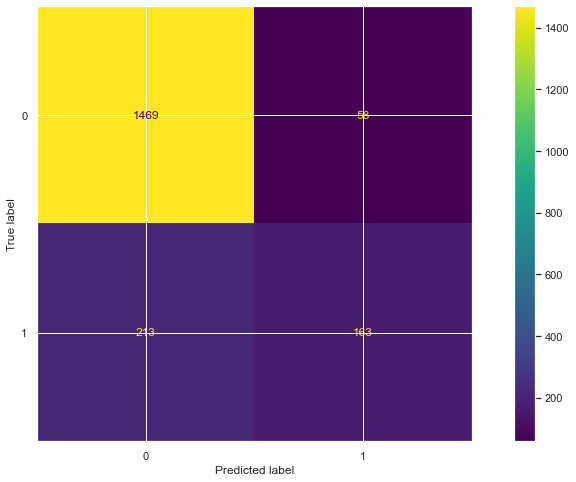

Complement Naive Bayes :


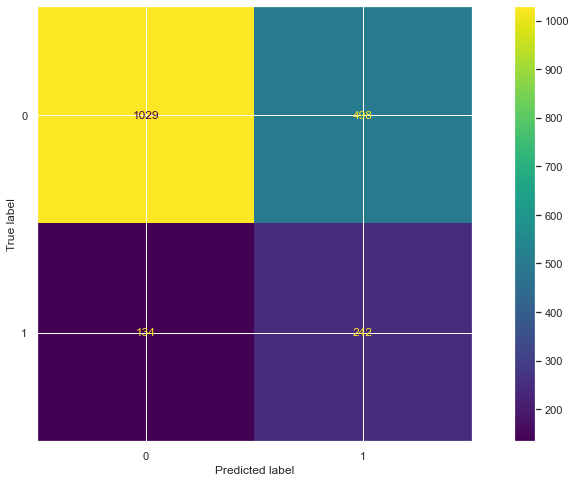

KNN :


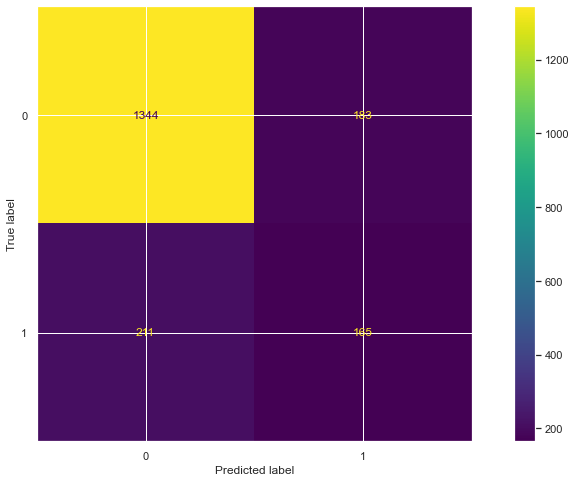

SVM :


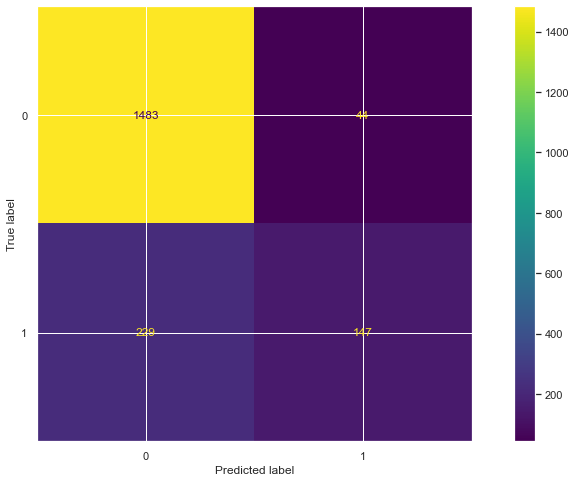

In [101]:
for i,j in enumerate(b):
  j.fit(x_train,y_train)
  pred1=j.predict(x_test)
  print(dic[i],':')
  print(plot_confusion_matrix(j,x_test,y_test))
  plt.show()
   

Logistic Regression :


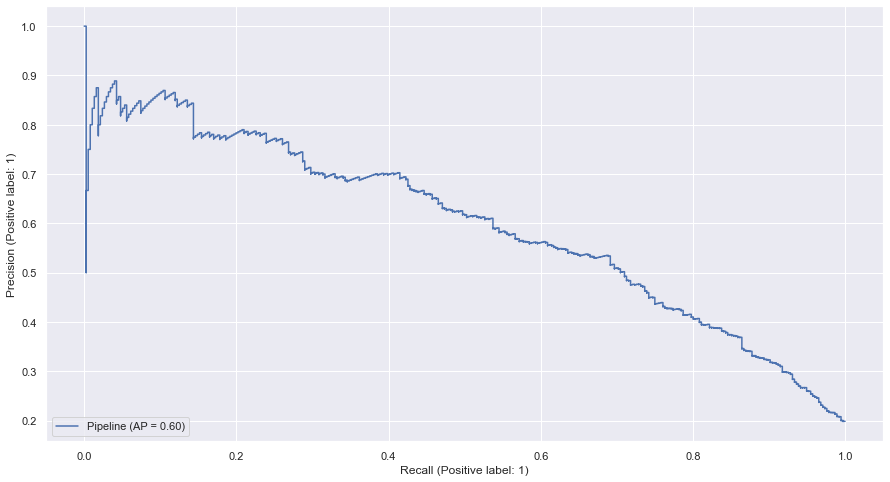

Random Forest :


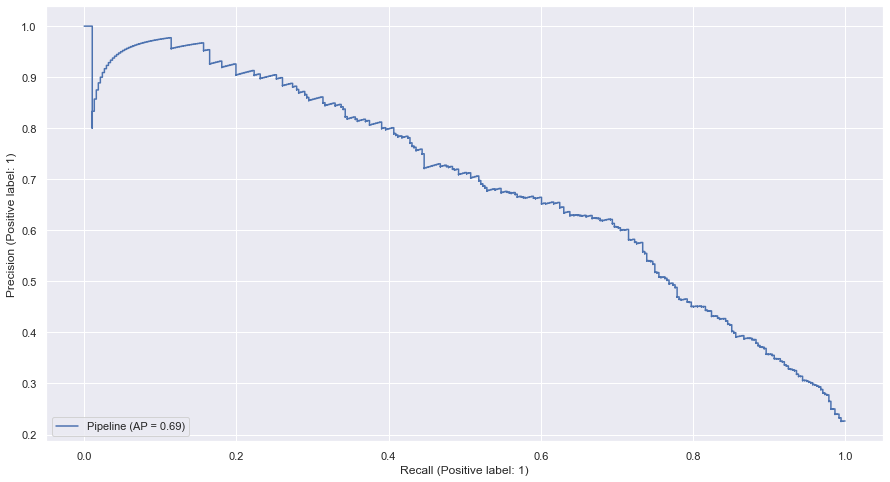

Decision Tree :


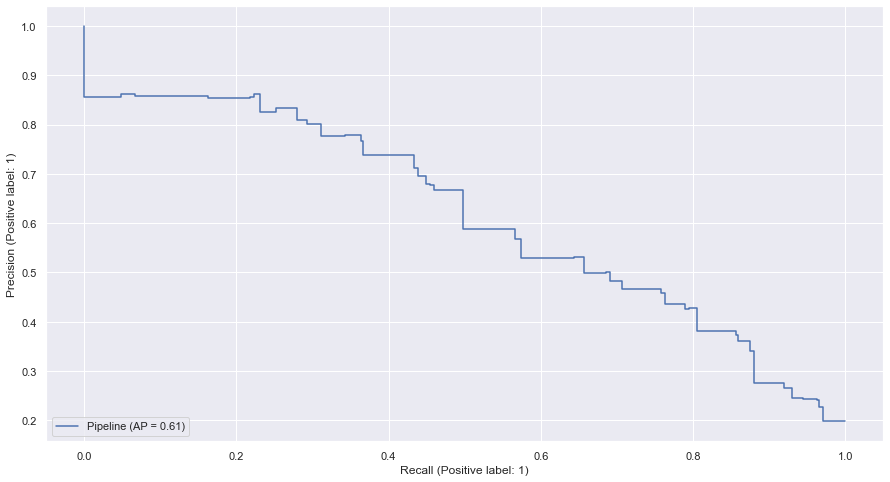

Complement Naive Bayes :


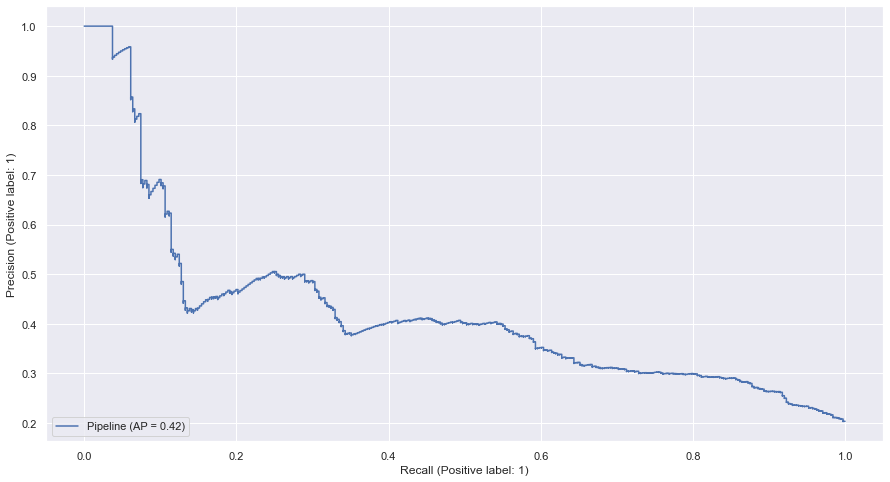

KNN :


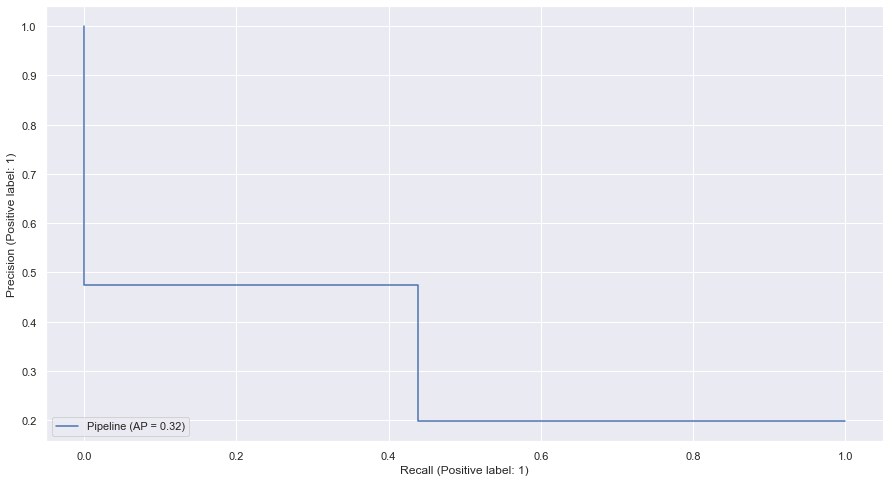

SVM :


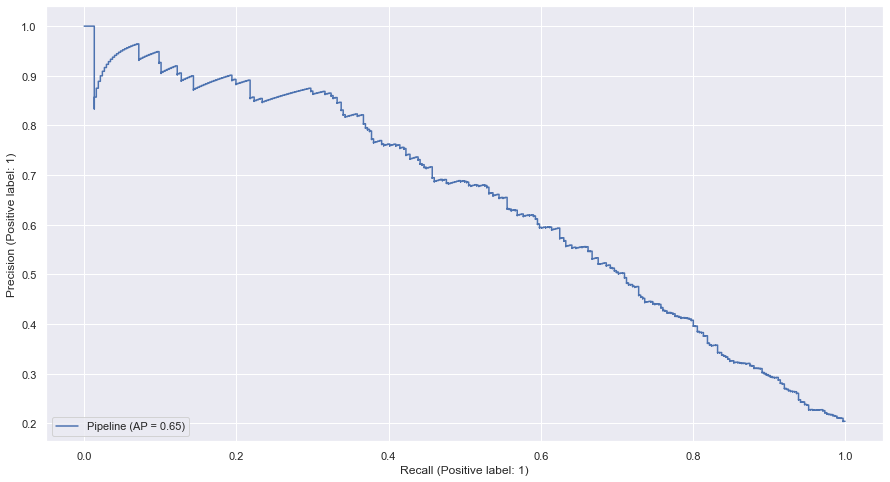

In [102]:
for i,j in enumerate(b):
  j.fit(x_train,y_train)
  pred1=j.predict(x_test)
  print(dic[i],':')
  print(plot_precision_recall_curve(j,x_test,y_test))
  plt.show()
   

In [103]:
for i,j in enumerate(b):
  j.fit(x_train,y_train)
  pred1=j.predict(x_test)
  print(dic[i],':')
  print("F1 Score :",f1_score(y_test,pred1))
  print(classification_report(y_test,pred1))
  

Logistic Regression :
F1 Score : 0.4143126177024482
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1527
           1       0.71      0.29      0.41       376

    accuracy                           0.84      1903
   macro avg       0.78      0.63      0.66      1903
weighted avg       0.82      0.84      0.81      1903

Random Forest :
F1 Score : 0.5144927536231884
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1527
           1       0.81      0.38      0.51       376

    accuracy                           0.86      1903
   macro avg       0.84      0.68      0.72      1903
weighted avg       0.85      0.86      0.84      1903

Decision Tree :
F1 Score : 0.5460636515912898
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1527
           1       0.74      0.43      0.55       376

    accuracy                          

In [104]:
## To conclude , we have Applied 6 different Supervised machine learning Classification Algorithms namely KNN classification, Decision Tree, Random Forest, Compliment Naive Bayes, Support Vector Machine (SVM) and Logistic Regression. 
## Our concrete goal is it to find the best fit model based on the data considered for the prediction of customer churn in the banking institution and its achieved.
## Before Tuning the Hyperparameters of the model, Random Forest has performed best for the data since its F1-score is 0.51. After Tuning, we can consider Decision Tree as best Model since the F1-score is 0.54 which is higher and better than the other models. 
## so, we can conclude Decision Tree offers best for the customer churn prediction on this data. 